See first DCT.ipynb

For testing the orghogonality, the quantization error is computed for each subband and compared to the quantization error in the image domain.

In [2]:
import urllib.request

try:
    import pywt
except:
    !pip3 install pywavelets --user
    
try:
    import numpy as np
except:
    !pip3 install numpy --user

try:
    from matplotlib import pyplot as plt
except:
    !pip3 install matplotlib --user
    
import numpy as np

try:
    import cv2
except:
    !pip3 install opencv-python --user

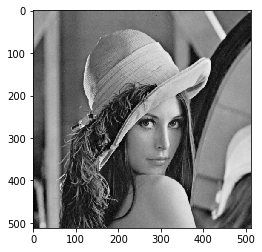

In [3]:
# Load lena
%matplotlib inline

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BRG, cv2.COLOR_BGR2YUV)[:,:,0]
plt.imshow(Y, cmap="gray")

In [4]:
print("Energy of the image =", np.sum(Y**2))

Energy of the image = 27715149


In [6]:
wavelet = 'haar'
decomposition = pywt.wavedec2(Y, wavelet=wavelet, level=1, mode="per")
print("Energy of the decomposition =", np.sum(decomposition[0]**2+decomposition[1][0]**2+decomposition[1][1]**2+decomposition[1][2]**2))

Energy of the decomposition = 4634389325.0


HH =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  1.50000000e+00 ... -1.50000000e+00
  -7.00000000e+00  5.00000000e-01]
 ...
 [ 0.00000000e+00  2.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   5.00000000e+00 -5.50000000e+00]
 [ 0.00000000e+00 -1.50000000e+00 -2.00000000e+00 ...  5.10702591e-15
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.50000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Q(HH) = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  1.50000000e+00 ... -1.50000000e+00
  -7.00000000e+00  5.00000000e-01]
 ...
 [ 0.00000000e+00  2.00000000e

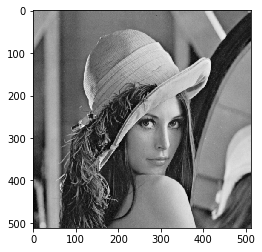

In [4]:
decomposition = pywt.wavedec2(Y, wavelet=wavelet, level=1, mode="per")
q_step = 10
print("HH = ", decomposition[1][2])
quantized_HH = (decomposition[1][2]/q_step).astype(np.int)*q_step
print("Q(HH) =", decomposition[1][2])
quantization_error = decomposition[1][2] - quantized_HH
print("quantization error = ", quantization_error)
print("energy of the quantization error in the wavelet domain =", np.sum(quantization_error**2))
decomposition[1][2][:,:] = np.copy(quantization_error)
reconstruction = pywt.waverec2(decomposition, wavelet=wavelet, mode="per")
plt.imshow(reconstruction, cmap="gray")

energy of the quantization error in the image domain = 313299.99999999994


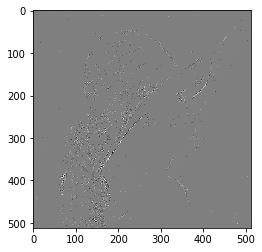

In [5]:
reconstruction_error = Y - reconstruction
plt.imshow(reconstruction_error, cmap="gray")
print("energy of the quantization error in the image domain =", np.sum(reconstruction_error**2))

HL =  [[ 0.   1.   5.  ... -1.   1.  27. ]
 [ 0.   1.   5.  ... -1.   1.  27. ]
 [ 0.   2.   3.5 ...  0.5  8.  26.5]
 ...
 [ 0.   3.   0.  ... -4.   2.  -1.5]
 [ 0.   1.5  5.  ... -4.  -3.   2. ]
 [ 0.  -3.5  7.  ... -7.  -4.  -3. ]]
Q(HL) = [[ 0.   1.   5.  ... -1.   1.  27. ]
 [ 0.   1.   5.  ... -1.   1.  27. ]
 [ 0.   2.   3.5 ...  0.5  8.  26.5]
 ...
 [ 0.   3.   0.  ... -4.   2.  -1.5]
 [ 0.   1.5  5.  ... -4.  -3.   2. ]
 [ 0.  -3.5  7.  ... -7.  -4.  -3. ]]
quantization error =  [[ 0.   1.   5.  ... -1.   1.   7. ]
 [ 0.   1.   5.  ... -1.   1.   7. ]
 [ 0.   2.   3.5 ...  0.5  8.   6.5]
 ...
 [ 0.   3.   0.  ... -4.   2.  -1.5]
 [ 0.   1.5  5.  ... -4.  -3.   2. ]
 [ 0.  -3.5  7.  ... -7.  -4.  -3. ]]
energy of the quantization error in the wavelet domain = 1038395.2500000002


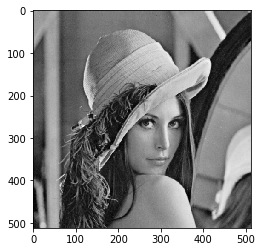

In [6]:
decomposition = pywt.wavedec2(Y, wavelet=wavelet, level=1, mode="per")
q_step = 10
print("HL = ", decomposition[1][1])
quantized_HL = (decomposition[1][1]/q_step).astype(np.int)*q_step
print("Q(HL) =", decomposition[1][1])
quantization_error = decomposition[1][1] - quantized_HL
print("quantization error = ", quantization_error)
print("energy of the quantization error in the wavelet domain =", np.sum(quantization_error**2))
decomposition[1][1][:,:] = np.copy(quantization_error)
reconstruction = pywt.waverec2(decomposition, wavelet=wavelet, mode="per")
plt.imshow(reconstruction, cmap="gray")

energy of the quantization error in the image domain = 4924699.999999999


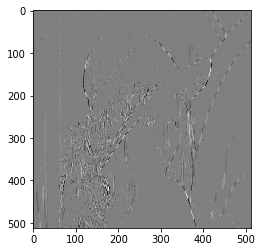

In [7]:
reconstruction_error = Y - reconstruction
plt.imshow(reconstruction_error, cmap="gray")
print("energy of the quantization error in the image domain =", np.sum(reconstruction_error**2))

energy of the quantization error in the wavelet domain = 1626784.5000000005


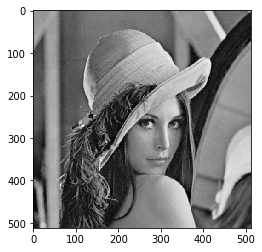

In [8]:
decomposition = pywt.wavedec2(Y, wavelet=wavelet, level=1, mode="per")
q_step = 10
quantized_HL = (decomposition[1][1]/q_step).astype(np.int)*q_step
quantized_HH = (decomposition[1][2]/q_step).astype(np.int)*q_step
quantization_error_HL = decomposition[1][1] - quantized_HL
quantization_error_HH = decomposition[1][2] - quantized_HH
print("energy of the quantization error in the wavelet domain =", np.sum(quantization_error_HL**2)+np.sum(quantization_error_HH**2))
decomposition[1][1][:,:] = np.copy(quantization_error_HL)
decomposition[1][2][:,:] = np.copy(quantization_error_HH)
reconstruction = pywt.waverec2(decomposition, wavelet=wavelet, mode="per")
plt.imshow(reconstruction, cmap="gray")

energy of the quantization error in the image domain = 5237999.999999999


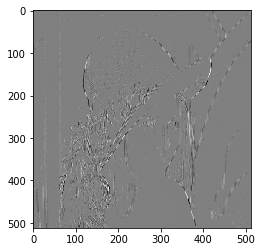

In [9]:
reconstruction_error = Y - reconstruction
plt.imshow(reconstruction_error, cmap="gray")
print("energy of the quantization error in the image domain =", np.sum(reconstruction_error**2))

In [ ]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result#[result.size//2:]

In [ ]:
N = 32
mu, sigma = 0, 0.1
signal = (255*np.random.normal(mu, sigma, size=N)).astype(int) # Gaussian
print(signal)
coeffs = DCT(signal)
print(coeffs)
print(autocorr(coeffs))

Another different test consists in measuring the quantization error in the transform and the signal domains. If both errors are the same, the transform is orthonormal (preserves the energy and orthogonal).

In [ ]:
q_step = 10
N = 32
mu, sigma = 0, 0.1
#signal = (255*np.random.normal(mu, sigma, size=N)).astype(int) # Gaussian
signal = np.random.randint(255, size=N) # Uniform
print("signal =", signal)
coeffs = DCT(signal)
print("coefficients =", coeffs)
quantized_coeffs = (coeffs/q_step).astype(np.int)*q_step
print("quantized coefficients = ", quantized_coeffs)
quantization_error_coeffs_domain = coeffs - quantized_coeffs
print("quantization error in the transform domain = ", quantization_error_coeffs_domain, np.sum(quantization_error_coeffs_domain**2))
reconstructed_signal = iDCT(quantized_coeffs)
print("reconstructed signal =", reconstructed_signal)
quantization_error_signal_domain = signal - reconstructed_signal
print("quantization error in the signal domain = ", quantization_error_signal_domain, np.sum(quantization_error_signal_domain**2))